# Script for choosing the best batch size for the svd model


In [1]:
from os import path
import numpy as np
import matplotlib.pyplot as plt

import sys
parent_path = path.abspath('..')
sys.path.insert(0, parent_path)
import dfFunctions
from utils import rmse
import recommender as re


path = parent_path + '/movielens/ml-1m/ratings.dat'
df = dfFunctions.load_dataframe(path)
model = re.SVDmodel(df, 'user', 'item', 'rating', 'svd')

regularizer_constant = 0.05
learning_rate = 0.001
momentum_factor = 0.9
num_steps = 9000
dimension = 12

In [ ]:
all_batch_sizes = np.array(list(range(1,31)))*100
#all_batch_sizes = list(test_range)
results = []
times = []

for batch_size in all_batch_sizes:
    print("\nbatch_size = {}".format(batch_size))
    model.training(dimension,
               regularizer_constant,
               learning_rate,
               momentum_factor,
               batch_size,
               num_steps,
               False)
    users, items, rates = model.test_batches.get_batch()
    predicted_ratings = model.prediction(users,items)
    result = rmse(predicted_ratings, rates)
    results.append(result)
    times.append(model.duration)

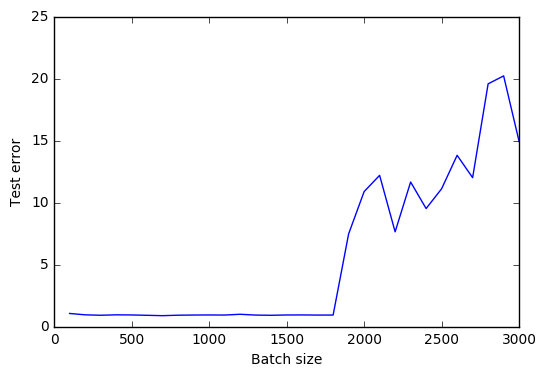

In [3]:
plt.plot(all_batch_sizes,results)
plt.xlabel('Batch size')
plt.ylabel('Test error')
plt.show()

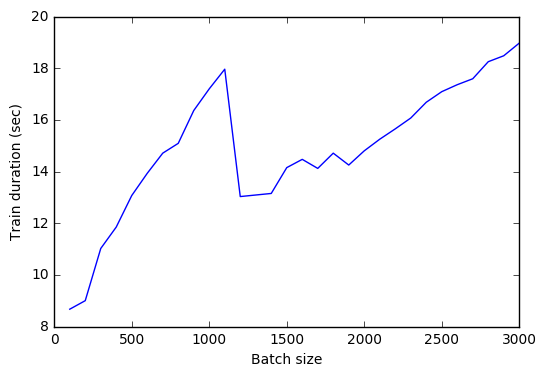

In [4]:
plt.plot(all_batch_sizes,times)
plt.xlabel('Batch size')
plt.ylabel('Train duration (sec)')
plt.show()

In [8]:
all_batch_sizes = list(all_batch_sizes)
best_result = min(list(zip(results,all_batch_sizes,times)))
result_string = """In an experiment with batch sizes from {0} to {1}
the best size for the mini batch is {2} with error {3}.
Using this size the training will take {4} seconds""".format(all_batch_sizes[0],
                                                             all_batch_sizes[-1:][0],
                                                             best_result[1],
                                                             best_result[0],
                                                             best_result[2])
print(result_string)

In an experiment with batch sizes from 100 to 3000
the best size for the mini batch is 700 with error 0.8733594417572021.
Using this size the training will take 14.71 seconds


In [11]:
print(np.mean(results),np.std(results))

5.59026 6.21118


In [13]:
print(np.mean(times),np.std(times))

14.8673333333 2.54731745611
